In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


# Import libryries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import shapiro
from termcolor import colored
from sklearn import preprocessing
from sklearn.cluster import DBSCAN

warnings.filterwarnings("ignore")

# Loading data

In [3]:
data_df=pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')

In [4]:
data_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
data_df.set_index('id')

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [7]:
data_df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [8]:
data_df.isnull().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

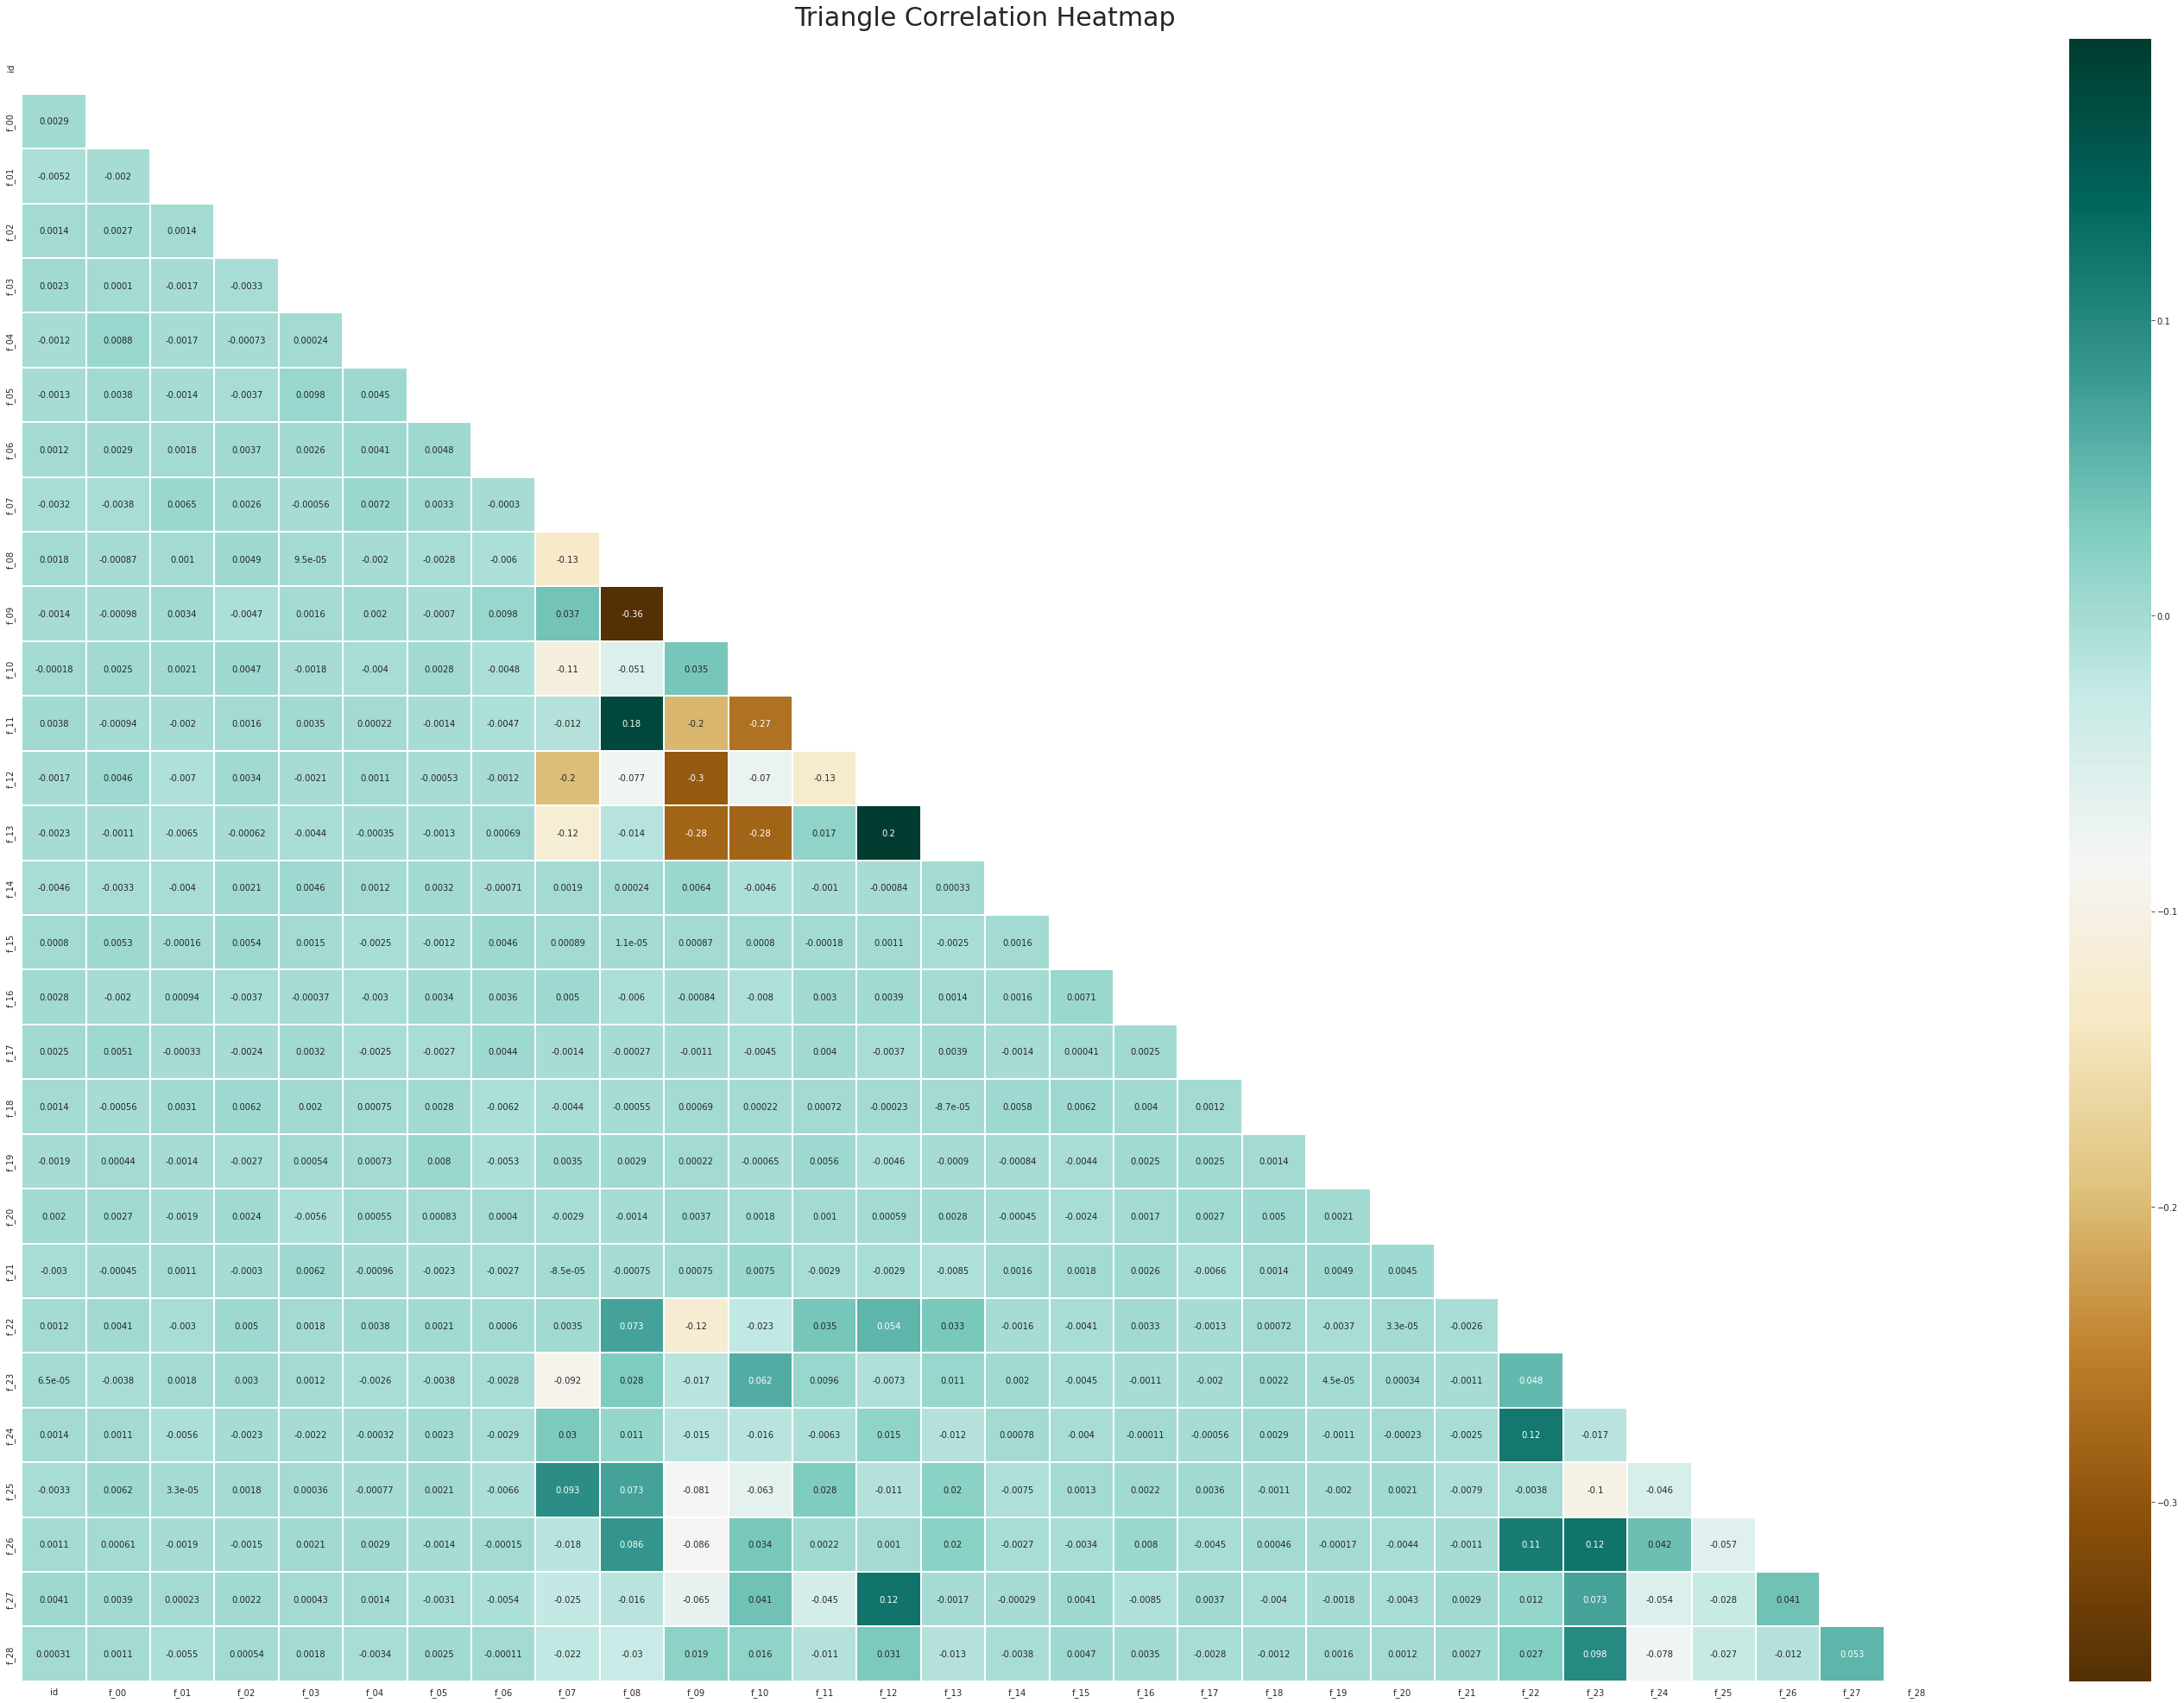

In [9]:
plt.figure(figsize=(50, 35))
sns.set_style('white')
mask = np.triu(np.ones_like(data_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_df.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

In [10]:
data_df= data_df.drop(['id'], axis=1)

In [11]:
# Univariate normality test
for col in data_df.columns:
    features = []
    stat, p_value = shapiro(data_df[col])
    alpha = 0.05    # significance level
    if p_value > alpha: 
        result = colored('Accepted', 'green')
    else:
        result = colored('Rejected','red')
#         features = features + "colname"
    print('Feature: {}\t Hypothesis: {}'.format(col, result))

Feature: f_00	 Hypothesis: Accepted
Feature: f_01	 Hypothesis: Accepted
Feature: f_02	 Hypothesis: Accepted
Feature: f_03	 Hypothesis: Accepted
Feature: f_04	 Hypothesis: Accepted
Feature: f_05	 Hypothesis: Accepted
Feature: f_06	 Hypothesis: Accepted
Feature: f_07	 Hypothesis: Rejected
Feature: f_08	 Hypothesis: Rejected
Feature: f_09	 Hypothesis: Rejected
Feature: f_10	 Hypothesis: Rejected
Feature: f_11	 Hypothesis: Rejected
Feature: f_12	 Hypothesis: Rejected
Feature: f_13	 Hypothesis: Rejected
Feature: f_14	 Hypothesis: Accepted
Feature: f_15	 Hypothesis: Accepted
Feature: f_16	 Hypothesis: Accepted
Feature: f_17	 Hypothesis: Accepted
Feature: f_18	 Hypothesis: Accepted
Feature: f_19	 Hypothesis: Accepted
Feature: f_20	 Hypothesis: Accepted
Feature: f_21	 Hypothesis: Accepted
Feature: f_22	 Hypothesis: Rejected
Feature: f_23	 Hypothesis: Rejected
Feature: f_24	 Hypothesis: Rejected
Feature: f_25	 Hypothesis: Rejected
Feature: f_26	 Hypothesis: Rejected
Feature: f_27	 Hypothesis: R

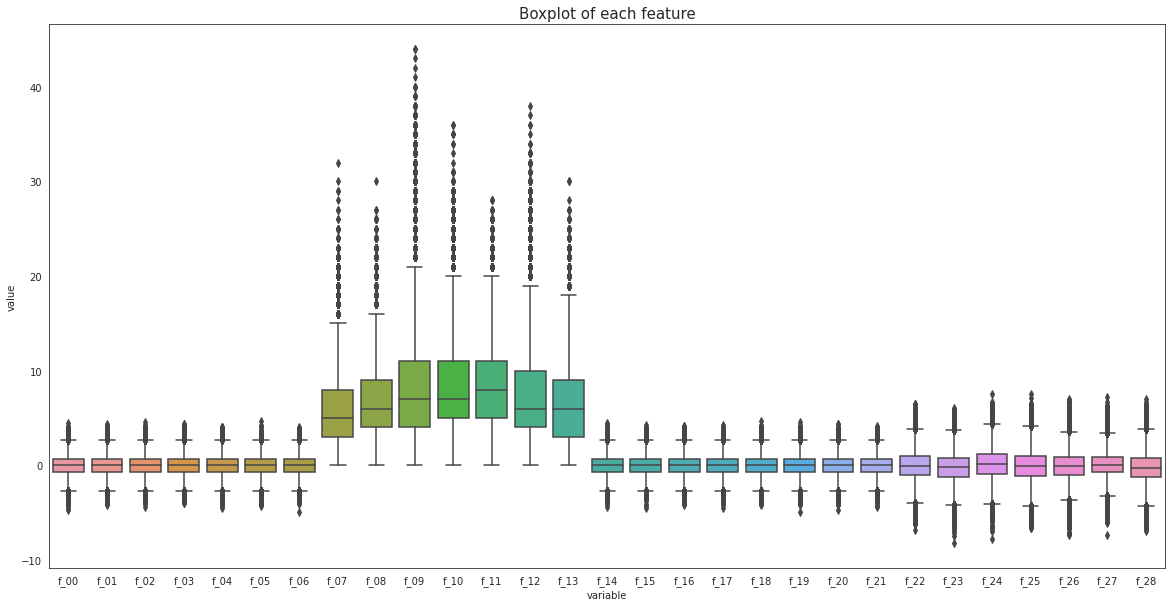

In [12]:
# Outlier processing
tmp_DATA = data_df
plt.figure(figsize=(20,10)) 
sns.boxplot(x="variable", y="value", data=pd.melt(tmp_DATA)).set_title('Boxplot of each feature',size=15)
plt.show()

In [13]:
data_df = preprocessing.normalize(data_df)

In [14]:
data_df=pd.DataFrame(data_df)

In [15]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.015210,-0.035652,0.025347,0.023007,-0.032451,0.028654,0.088216,0.078117,0.507761,0.546820,...,-0.018686,-0.029567,-0.029826,-0.042588,0.044630,-0.034538,0.044445,0.051131,0.057143,0.031775
1,-0.032135,-0.021165,0.030500,0.046402,-0.077070,0.040274,-0.004226,0.093248,0.139871,0.279743,...,-0.019992,-0.004192,-0.083186,-0.039139,0.021432,0.082030,-0.012841,-0.039731,0.026224,-0.124977
2,0.036522,0.014651,-0.052841,-0.028190,0.004760,0.035388,0.089752,0.225701,0.496542,0.225701,...,-0.018667,-0.072332,0.053761,0.147478,-0.003987,-0.097893,-0.044011,0.060297,-0.050135,-0.163892
3,-0.024237,0.011082,0.012779,0.011202,0.020080,-0.059090,0.006718,0.290305,0.096768,0.628995,...,0.029964,0.062309,0.025781,0.050157,-0.098792,0.069697,-0.091939,-0.030519,-0.002450,0.011532
4,-0.031032,-0.048057,-0.012489,-0.084612,-0.013412,-0.085655,0.036147,0.369836,0.323607,0.231148,...,-0.075300,-0.020107,0.014909,0.013144,-0.112725,0.068139,-0.048295,0.074091,-0.018735,-0.091870


In [16]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(data_df)
DBSCAN_dataset = data_df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [17]:
DBSCAN_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Cluster
0,-0.015210,-0.035652,0.025347,0.023007,-0.032451,0.028654,0.088216,0.078117,0.507761,0.546820,...,-0.029567,-0.029826,-0.042588,0.044630,-0.034538,0.044445,0.051131,0.057143,0.031775,0
1,-0.032135,-0.021165,0.030500,0.046402,-0.077070,0.040274,-0.004226,0.093248,0.139871,0.279743,...,-0.004192,-0.083186,-0.039139,0.021432,0.082030,-0.012841,-0.039731,0.026224,-0.124977,0
2,0.036522,0.014651,-0.052841,-0.028190,0.004760,0.035388,0.089752,0.225701,0.496542,0.225701,...,-0.072332,0.053761,0.147478,-0.003987,-0.097893,-0.044011,0.060297,-0.050135,-0.163892,0
3,-0.024237,0.011082,0.012779,0.011202,0.020080,-0.059090,0.006718,0.290305,0.096768,0.628995,...,0.062309,0.025781,0.050157,-0.098792,0.069697,-0.091939,-0.030519,-0.002450,0.011532,0
4,-0.031032,-0.048057,-0.012489,-0.084612,-0.013412,-0.085655,0.036147,0.369836,0.323607,0.231148,...,-0.020107,0.014909,0.013144,-0.112725,0.068139,-0.048295,0.074091,-0.018735,-0.091870,0


In [18]:
submission_df=DBSCAN_dataset['Cluster']

In [19]:
submission_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Cluster, dtype: int64

In [20]:
submission=submission_df.to_csv("submission5.csv")